In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

In [2]:
# loading the data from csv file to pandas dataframe
car_dataset=pd.read_csv("C:\\Users\\SAI BHUVAN\\Documents\\ACG_files\\car data.csv")

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
# checking the number of rows and columns
car_dataset.shape

(301, 9)

In [5]:
# getting some information about the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
# finding number of null values in each column
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
# cheaking distribution of caztegorical data

print(car_dataset.Fuel_Type.value_counts())
print()
print(car_dataset.Seller_Type.value_counts())
print()
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [8]:
car_dataset= pd.get_dummies(car_dataset,columns=['Fuel_Type','Seller_Type','Transmission'],)


In [9]:
car_dataset

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,ritz,2014,3.35,5.59,27000,0,0,0,1,1,0,0,1
1,sx4,2013,4.75,9.54,43000,0,0,1,0,1,0,0,1
2,ciaz,2017,7.25,9.85,6900,0,0,0,1,1,0,0,1
3,wagon r,2011,2.85,4.15,5200,0,0,0,1,1,0,0,1
4,swift,2014,4.60,6.87,42450,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,0,0,1,0,1,0,0,1
297,brio,2015,4.00,5.90,60000,0,0,0,1,1,0,0,1
298,city,2009,3.35,11.00,87934,0,0,0,1,1,0,0,1
299,city,2017,11.50,12.50,9000,0,0,1,0,1,0,0,1


In [10]:
X=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']

In [11]:
X

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,2014,5.59,27000,0,0,0,1,1,0,0,1
1,2013,9.54,43000,0,0,1,0,1,0,0,1
2,2017,9.85,6900,0,0,0,1,1,0,0,1
3,2011,4.15,5200,0,0,0,1,1,0,0,1
4,2014,6.87,42450,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,0,1,0,1,0,0,1
297,2015,5.90,60000,0,0,0,1,1,0,0,1
298,2009,11.00,87934,0,0,0,1,1,0,0,1
299,2017,12.50,9000,0,0,1,0,1,0,0,1


In [12]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=13)

In [14]:
# loading the linear regression model
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred_test=lin_reg.predict(X_test)
y_pred_test

array([ 1.37585391e+00,  1.02932259e+01,  4.44239926e+00,  1.04494986e+01,
        4.98970949e+00,  1.68957979e+01,  1.81515045e+01,  5.02409692e+00,
        3.57794826e+00,  8.60338045e-01,  4.41265512e+00,  6.63931512e-01,
        1.05863383e+01,  7.73652557e+00,  5.12255193e+00,  5.13791596e+00,
       -8.26615339e-01,  6.54672597e+00,  1.09694567e+00,  6.22428684e+00,
        1.66788219e+01,  7.14653179e+00,  9.21919458e-01,  7.43668519e+00,
        2.03190461e+00,  5.57094280e+00,  1.45024252e+00,  6.67385098e+00,
        7.95586324e+00,  3.43443441e+00,  2.92086469e+00,  1.11075972e-02,
       -9.67520884e-01,  1.28512608e+00,  4.44510572e-02,  7.36450398e+00,
       -9.53986931e-01,  3.43637292e+00,  1.00543096e+00,  4.23334661e+00,
        1.44492636e+00,  7.51792331e+00,  6.60250428e+00,  6.52641346e+00,
        7.49877891e+00,  7.13978255e-01])

In [16]:
r2_score(y_test,y_pred_test)

0.865427092753968

# Visualize the actual prices and Predicted prices

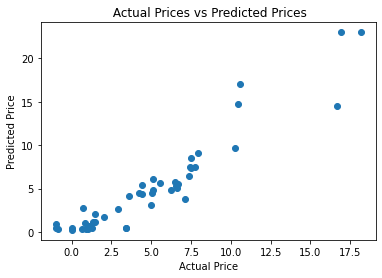

In [17]:
plt.scatter(y_pred_test,y_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [18]:
y_pred_train=lin_reg.predict(X_train)
y_pred_train

array([ 1.81102986e+00,  4.73432446e+00,  5.51995386e+00,  2.94693468e+00,
        7.37042886e+00,  1.44544944e+00,  8.35329842e-01,  3.48879978e+00,
        5.53565301e+00,  3.03997894e+00, -2.37224763e+00,  1.02352255e+01,
        5.24761399e+00,  2.83123613e+00,  5.70797963e+00,  7.53964280e+00,
        1.45401834e+01,  2.58501743e-02,  5.73752030e+00,  1.03424976e+00,
        6.66881084e+00,  9.78296535e+00,  6.29679969e+00,  1.54499440e+00,
        1.60152922e-01,  2.39406429e+00,  4.61023727e+00,  1.97630508e+01,
       -2.88024267e+00,  4.22033087e+00,  4.83895161e+00,  2.03487169e+01,
        7.99820041e+00,  1.98358414e+00,  3.36217486e+00,  5.88758123e+00,
        9.23455010e+00,  6.26783809e-01,  1.07925740e+01,  6.81799165e-01,
        2.18532984e+00,  6.33923080e+00,  6.30646168e-01,  4.43775659e+00,
        3.27286980e-01,  8.60175542e+00, -1.05668018e+00,  3.46309913e+00,
        8.07374434e+00,  1.14741611e+00,  3.84214260e+00, -2.90621993e+00,
        3.95052436e-01,  

In [19]:
r2_score(y_train,y_pred_train)

0.8851851297400637

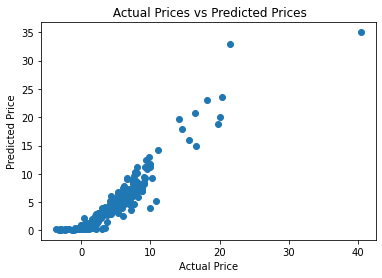

In [20]:
plt.scatter(y_pred_train,y_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [21]:
# loading the lasso regression model
lass_reg_model = Lasso()
lass_reg_model.fit(X_train,y_train)

Lasso()

In [22]:
# predicting test data
y_pred_test=lass_reg_model.predict(X_test)

In [23]:
r2_score(y_test,y_pred_test)

0.8304841094746205

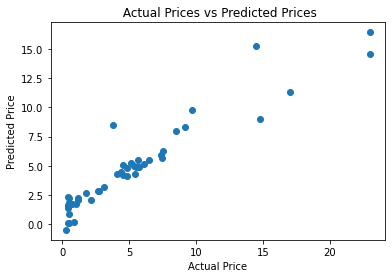

In [24]:
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [25]:
# predicting train data
y_pred_train=lass_reg_model.predict(X_train)

In [26]:
r2_score(y_train,y_pred_train)

0.842107112834807

# Visualize the actual prices and Predicted prices

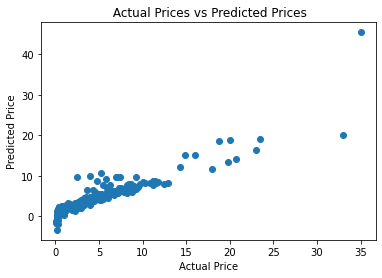

In [27]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()